In [12]:
import numpy as np
import mne
import moabb
from moabb.datasets import BNCI2014_001, BNCI2014_002, Shin2017A, Cattan2019_VR, PhysionetMI, Schirrmeister2017, utils
from moabb.paradigms import MotorImagery
from mne_connectivity import spectral_connectivity_epochs
import matplotlib.pyplot as plt

In [14]:
# From https://www.ncbi.nlm.nih.gov/pmc/articles/PMC8865144/ Table 2 Cortex Means
ch_names = [
    "Fz", "FC3", "FC1", "FCz", "FC2", "FC4", "C5", "C3", "C1", "Cz", "C2",
        "C4", "C6", "CP3", "CP1", "CPz", "CP2", "CP4", "P1", "Pz", "P2", "POz",
        "EOG1", "EOG2", "EOG3"
]

EEG_Locations = {
	"Fz": [0.88, 34,43, 62.21],
	"FC3": [-46.09, 7.35, 56.46],
	"FC1": [-24.69, 5.73, 71.11],
	"FCz": [0.41, 6.77, 75.19],
	"FC2": [24.09, 5.4, 72.18],
	"FC4": [47.52, 6.49, 58.34],
	"C5": [-66.15, -20.58, 33.83],
	"C3": [-50.88, -21.18, 59.95],
	"C1": [-25.56, -23.82, 75.26],
	"Cz": [-0.47, -24.64, 80.16],
	"C2": [23.84, -24.31, 78.00],
	"C4": [50.78, -23.18, 63.58],
	"C6": [66.48, -21.77, 36.16],
	"CP3": [-49.15, -47.78, 58.42],
	"CP1": [-25.64, -48.14, 71.46],
	"CPz": [-0.73, -50.47, 75.85],
	"CP2": [24.46, -49.71, 75.38],
	"CP4": [46.66, -48.71, 62.98],
	"P1":  [-25.9, -68.45, 61.21],
	"Pz": [-1.94, -69.12, 66.04],
	"P2": [20.8, -69.28, 64.82],
	"POz": [-2.76, -90.20, 42.12]
}

In [15]:
paradigm = MotorImagery(n_classes=4, channels=ch_names)

Choosing from all possible events


In [16]:
datasetMotorImagery = BNCI2014_001()
subjects = [1, 2, 3, 4, 5]

X, y, metadata = paradigm.get_data(dataset=datasetMotorImagery, subjects=subjects)
print(metadata.columns)
print(np.unique(y))

/home/hice1/mchen439/miniconda3/envs/MATH8803/lib/python3.8/site-packages/sklearn/preprocessing/_function_transformer.py:312: FutureWarning: The current default of copy=False will change to copy=True in 1.7. Set the value of copy explicitly to avoid this warning
  return func(X, **(kw_args if kw_args else {}))
/home/hice1/mchen439/miniconda3/envs/MATH8803/lib/python3.8/site-packages/sklearn/preprocessing/_function_transformer.py:312: FutureWarning: The current default of copy=False will change to copy=True in 1.7. Set the value of copy explicitly to avoid this warning
  return func(X, **(kw_args if kw_args else {}))
/home/hice1/mchen439/miniconda3/envs/MATH8803/lib/python3.8/site-packages/sklearn/preprocessing/_function_transformer.py:312: FutureWarning: The current default of copy=False will change to copy=True in 1.7. Set the value of copy explicitly to avoid this warning
  return func(X, **(kw_args if kw_args else {}))
/home/hice1/mchen439/miniconda3/envs/MATH8803/lib/python3.8/site

In [8]:
print(X.shape, y.shape, type(X), type(y))

(2880, 22, 1001) (2880,) <class 'numpy.ndarray'> <class 'numpy.ndarray'>


In [9]:
feet_indices = np.where(y == "feet")[0]
left_hand_indices = np.where(y == "left_hand")[0]
right_hand_indices = np.where(y == "right_hand")[0]
tongue_indices = np.where(y == "tongue")[0]
X_feet = X[feet_indices, :, :]
X_left_hand = X[left_hand_indices, :, :]
X_right_hand = X[right_hand_indices, :, :]
X_tongue = X[tongue_indices, :, :]

print(X_feet.shape, X_left_hand.shape, X_right_hand.shape, X_tongue.shape)


(720, 22, 1001) (720, 22, 1001) (720, 22, 1001) (720, 22, 1001)


In [18]:
conn_feet = spectral_connectivity_epochs(
	X_feet,
	method="dpli",
	sfreq=250,
	fmin=1.3, # So we get at least 5 cycles
	fmax=46,
	faverage=True,
	verbose=False
)

conn_left_hand = spectral_connectivity_epochs(
	X_left_hand,
	method="dpli",
	sfreq=250,
	fmin=1.3, # So we get at least 5 cycles
	fmax=46,
	faverage=True,
	verbose=False
)

conn_right_hand = spectral_connectivity_epochs(
	X_right_hand,
	method="dpli",
	sfreq=250,
	fmin=1.3, # So we get at least 5 cycles
	fmax=46,
	faverage=True,
	verbose=False
)

conn_tongue = spectral_connectivity_epochs(
	X_right_hand,
	method="dpli",
	sfreq=250,
	fmin=1.3, # So we get at least 5 cycles
	fmax=46,
	faverage=True,
	verbose=False
)

print(conn_feet.shape, conn_left_hand.shape, conn_right_hand.shape, conn_tongue.shape)

(484, 1) (484, 1) (484, 1) (484, 1)


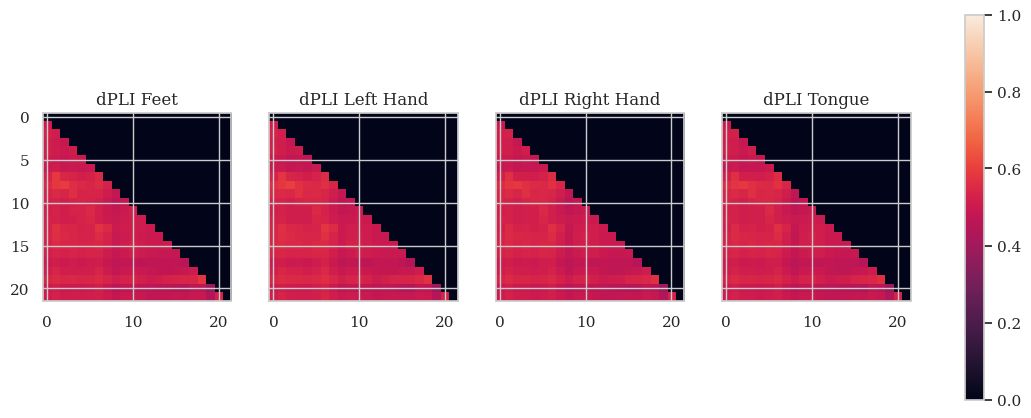

In [21]:
fig, axs = plt.subplots(1, 4, figsize=(14, 5), sharey=True)
axs[0].imshow(conn_feet.get_data("dense"), vmin=0, vmax=1)
axs[0].set_title("dPLI Feet")

axs[1].imshow(conn_left_hand.get_data("dense"), vmin=0, vmax=1)
axs[1].set_title("dPLI Left Hand")

im = axs[2].imshow(conn_right_hand.get_data("dense"), vmin=0, vmax=1)
axs[2].set_title("dPLI Right Hand")

im = axs[3].imshow(conn_tongue.get_data("dense"), vmin=0, vmax=1)
axs[3].set_title("dPLI Tongue")

fig.colorbar(im, ax=axs.ravel())
plt.show()

In [28]:
conn_feet_np = np.squeeze(conn_feet.get_data("dense"))
conn_feet_np[conn_feet_np == 0] = np.nan
print(np.nanmean(conn_feet_np), np.nanstd(conn_feet_np))

0.5119516191443566 0.028057174001855666
